In [9]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from mpl_toolkits import mplot3d
%matplotlib ipympl

In [10]:

def abs_dif(a,b):
    if(len(a) != len(b)):
        return DimensionError
    return sum([abs(x-b[a.index(x)]) for x in a])

def get_deriv(f,x,y=None,d= None):
    if(d == None):
        d = x/(10**9)
    if(y == None):
        return (f(x+d) - f(x-d))/(2*d)
    else:
        return (f(x+d,y) - f(x-d,y))/(2*d)

def get_derivs(d,vals,f,n = None):
    derivs = []
    for i in range(n):
        try:
            derivs.append(d[i](vals[i]))
        except:# Handles only n = 2 or less
            if(n == 1):
                derivs.append(get_deriv(f,vals[i]))
            else:
                derivs.append(get_deriv(f,vals[i],vals[i-1]))
    return derivs

def optimise_descent(f,d,ran):
    global lr , k , init
    n = len(ran)
    vals = []
    prev = []
    c = 0
    for i in ran:
        vals.append(init[c])
        prev.append(i[1])
        c += 1
    c = 0
    print('init',vals)
    while(abs_dif(prev,vals) > sum([abs(x) for x in vals])/1000):
        derivs = get_derivs(d,vals,f,n)
        prev = vals[:]
        for i in range(n):
            vals[i] -= derivs[i]*lr
            if(vals[i] > ran[i][1]):
                vals[i] = ran[i][1]
            elif(vals[i] < ran[i][0]):
                vals[i] = ran[i][0]
        print(vals,derivs)
        lr *= k
        xall.append(vals[:])
        c += 1
    print(c,vals,prev)
    return vals

In [ ]:
# problem 1
def f1(x):
    return x ** 2 + 3 * x + 8
def df1_dx(x):
    return 2*x + 3

xbase = np.linspace(-5,5, 100)
ybase = f1(xbase)
bestcost = 100000
init = [-5]
ran1 = (-5,5)

plt.cla()
plt.plot(xbase, ybase,color = 'blue')
xall, yall = [], []

# Learning rate 
lr = 1
k = 0.9

optimise_descent([f1],[df1_dx],[ran1])

l = len(xall)
xall = [x[0] for x in xall]
yall = [f1(x) for x in xall]
print(xall,yall)
plt.scatter(xall,yall,color = 'red')
plt.plot(xall,yall,color = 'red')
plt.show()

In [11]:
#Problem 2
xlim3 =  [-10, 10]
ylim3 =  [-10, 10]
init = [5,0]
def f3(x, y):
    return x**4 - 16*x**3 + 96*x**2 - 256*x + y**2 - 4*y + 262

def df3_dx(x, y = None):
    return 4*x**3 - 48*x**2 + 192*x - 256

def df3_dy(y,x = None):
    return 2*y - 4
xbase = np.linspace(-10,10, 100)
ybase = np.linspace(-10,10, 100)
X, Y = np.meshgrid(xbase, ybase)
zbase = f3(X,Y)

init [5, 0]
[3.0, 2.0] [4, -4]
[4.96, 2.0] [-4.0, 0.0]
[3.2605990912000475, 2.0] [3.5389439999999013, 0.0]
[4.021535146752772, 2.0] [-1.6169624381693097, 0.0]
[4.021516723012417, 2.0] [3.994877783952688e-05, 0.0]
5 [4.021516723012417, 2.0] [4.021535146752772, 2.0]
p [5, 3.0, 4.96, 3.2605990912000475, 4.021535146752772, 4.021516723012417] s [0, 2.0, 2.0, 2.0, 2.0, 2.0]
[7, 7, 3.0, 2.8493465600001855, 2.2988958740694443, 2.0000002150757155]


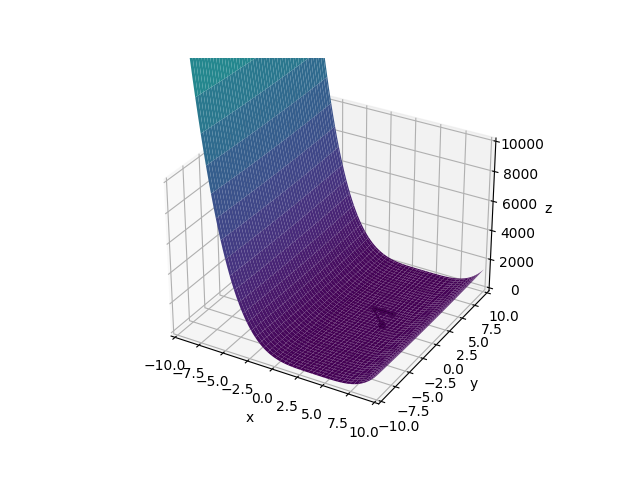

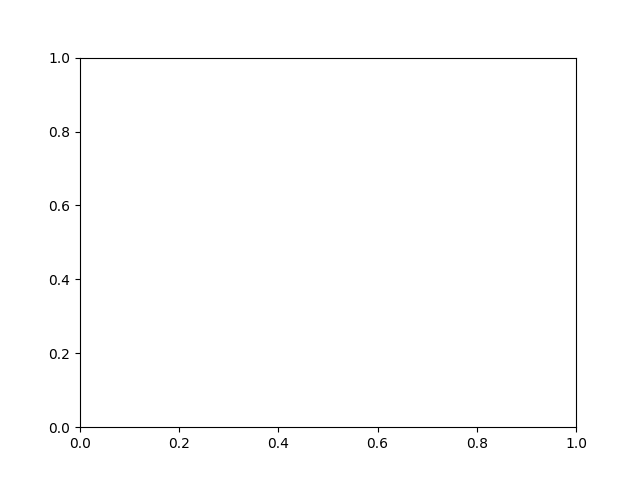

In [12]:
plt.cla()
fig = plt.figure()
ax = plt.axes(projection='3d')
#plt.xlim(-10,10)
#plt.ylim(-10,10)
ax.axes.set_xlim3d(left=-10, right=10) 
ax.axes.set_ylim3d(bottom=-10, top=10) 
ax.axes.set_zlim3d(bottom=-0, top=10000)
ax.plot_surface(X, Y, zbase,cmap = 'viridis')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
xall, yall , zall = [],[],[]

# Learning rate 
lr = 0.5
k = 0.98

optimise_descent(f3,[df3_dx,df3_dy],[xlim3,ylim3])

l = len(xall)
#print('x',xall,'s',yall)
yall = [init[1]]+[x[1] for x in xall]
xall = [init[0]]+[x[0] for x in xall]
print('p',xall,'s',yall)
zall = [f3(init[0],init[1])]
for i in range(l):
    zall.append(f3(xall[i],yall[i]))
print(zall)
ax.plot(xall, yall, zall,color = 'black')
ax.scatter(xall, yall, zall,color = 'black')
plt.show()

In [13]:
# problem 3
xlim4 = [-np.pi, np.pi]
def f4(x,y):
    return np.exp(-(x - y)**2) * np.sin(y)

def df4_dx(x, y):
    return -2 * np.exp(-(x - y)**2) * np.sin(y) * (x - y)

def df4_dy(x, y):
    return np.exp(-(x - y)**2) * np.cos(y) + 2 * np.exp(-(x - y)**2) * np.sin(y)*(x - y)
xbase = np.linspace(-np.pi, np.pi, 100)
xbase = np.linspace(-np.pi, np.pi, 100)
X, Y = np.meshgrid(xbase, ybase)
zbase = f4(X,Y)
bestcost = 100000
init = [-1,-2]
lr = 1
k = 0.95
xall, yall , zall = [], [] , []

init [-1, -2]
[-1.6690237253081932, -1.3808802306594075] [0.6690237253081932, -0.6191197693405925]
[-1.1742293036336762, -1.8823050640259742] [-0.5208362333415969, 0.5278156140700703]
[-1.9111026015835098, -1.168253031490473] [0.8164801085316717, -0.7911933878509707]
[-1.236160261905705, -1.859763185319064] [-0.7872195243362644, 0.8065434072938806]
[-1.896174928417874, -1.2093945645951023] [0.8103248643115616, -0.7984820505968638]
[-1.2758463945293912, -1.8377657848512143] [-0.8016849521942156, 0.8120789616326158]
[-1.8569473105533054, -1.2613386424625297] [0.7905146600513342, -0.7841565792524076]
[-1.3012287688191124, -1.8210469510092882] [-0.7957738256895124, 0.8014870631678525]
[-1.8112354555611068, -1.3136534412277068] [0.7687533616518614, -0.7648144160946144]
[-1.337690012795656, -1.7892127747477182] [-0.7513619774310761, 0.7545573644056403]
[-1.7681791733251002, -1.3601735954867318] [0.7189954925397566, -0.7165737590981848]
[-1.3838934646997456, -1.7455133385040449] [-0.675607676

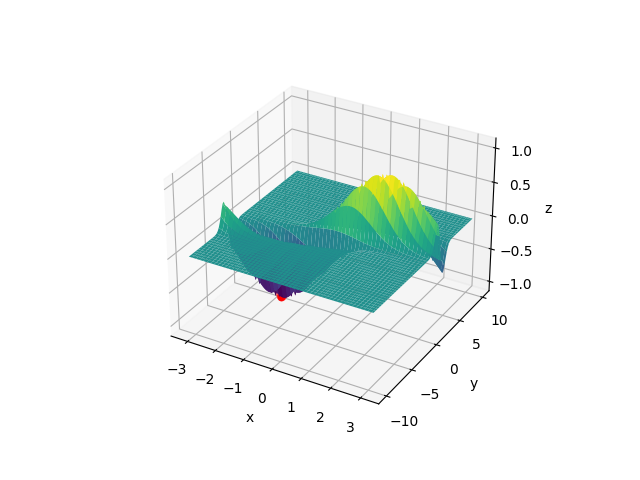

In [14]:
plt.cla()
plt.close()
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, zbase,cmap = 'viridis')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
xall, yall , zall = [], [],[]

# Learning rate 
lr = 1
k = 0.95

optimise_descent(f4,[df4_dx,df4_dy],[xlim4,xlim4])

l = len(xall)
#print('x',xall,'s',yall)
yall = [x[1] for x in xall]
xall = [x[0] for x in xall]
#print('p',xall,'s',yall)
for i in range(l):
    zall.append(f4(xall[i],yall[i]))
ax.plot(xall, yall, zall,color = 'red')
ax.scatter(xall, yall, zall,color = 'red')
plt.show()

In [15]:
#Problem 4
def f5(x):
    return np.cos(x)**4 - np.sin(x)**3 - 4*np.sin(x)**2 + np.cos(x) + 1



xbase = np.linspace(-5,5, 1000)
ybase = f5(xbase)
init = [0.2]
ran4 = (-5, 5) 


In [16]:
plt.cla()
plt.plot(xbase, ybase,color = 'blue')
xall, yall = [], []

# Learning rate 
lr = 0.2
k = 0.95

optimise_descent(f5,None,[ran4])

l = len(xall)
xall = [x[0] for x in xall]
yall = [f5(x) for x in xall]
print(xall)
print(yall)
plt.scatter(xall,yall,color = 'red')
plt.show()

init [0.2]
[0.7240976541642794] [-2.6204882708213972]
[2.003279619960588] [-6.732536662085835]
[1.3823131356290366] [3.4402575309227212]
[1.9006675551320573] [-3.0229154075114204]
[1.4927643783433948] [2.503990465319711]
[1.779528821397733] [-1.8530079325864646]
[1.5923348978521406] [1.2732688656545637]
[1.6988861094809182] [-0.7628921742028328]
[1.6448871002819794] [0.4069742704035795]
[1.6681088991026776] [-0.18422705727598515]
[1.6596423980551207] [0.07070301239745398]
[1.662161738309906] [-0.022146095693326505]
[1.6615678534375193] [0.0054952695984228405]
13 [1.6615678534375193] [1.662161738309906]
[0.7240976541642794, 2.003279619960588, 1.3823131356290366, 1.9006675551320573, 1.4927643783433948, 1.779528821397733, 1.5923348978521406, 1.6988861094809182, 1.6448871002819794, 1.6681088991026776, 1.6596423980551207, 1.662161738309906, 1.6615678534375193]
[0.01784932087236779, -3.4340334493561473, -3.618773629482206, -3.7400284217024975, -3.8886026519229437, -3.9699018192031055, -4.018

ValueError: s must be a scalar, or float array-like with the same size as x and y

In [ ]:
plt.cla()